In [51]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [52]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [53]:
df.head()   #Show the table
# print(df.shape)  #Show the shape, row & coloum

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [54]:
df.info()  #show the missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [55]:
df.duplicated().sum()  #show the duplicated rows

0

In [56]:
df['Exited'].value_counts()  #who leave the bank

Exited
0    7963
1    2037
Name: count, dtype: int64

In [57]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [58]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [59]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [60]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [61]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [62]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [63]:
X = df.drop(columns=['Exited'])
y = df['Exited']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [65]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [66]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [67]:
model = Sequential()

model.add(Dense(11, activation='relu', input_dim = 11))
model.add(Dense(11, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [68]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [69]:
#Model Compilation
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics =['accuracy'])

In [70]:
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split = 0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4312 - loss: 0.8128 - val_accuracy: 0.7781 - val_loss: 0.5381
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7897 - loss: 0.5092 - val_accuracy: 0.7981 - val_loss: 0.4747
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7973 - loss: 0.4682 - val_accuracy: 0.8025 - val_loss: 0.4497
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8147 - loss: 0.4346 - val_accuracy: 0.8062 - val_loss: 0.4363
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8132 - loss: 0.4293 - val_accuracy: 0.8094 - val_loss: 0.4268
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8211 - loss: 0.4223 - val_accuracy: 0.8150 - val_loss: 0.4196
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8382 - loss: 0.4032 - val_accuracy: 0.8125 - val_loss: 0.4124
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8320 - loss: 0.4094 - val_accu

In [71]:
model.layers[1].get_weights()

[array([[-4.5788744e-01,  5.2257180e-01,  2.1065605e-01,  6.7777820e-02,
          1.0384090e-02, -1.7548551e-01,  3.3672082e-01, -1.5456244e-01,
         -1.9324917e-01, -1.4256023e-01,  7.1379364e-01],
        [-8.7932783e-01,  2.5459203e-01, -1.8633756e-01, -3.8582686e-04,
         -3.5698751e-01, -1.4794931e+00,  1.1223961e-01,  7.1047741e-01,
         -2.0278886e-01,  1.7686057e-01,  4.8668855e-01],
        [-3.0048746e-01, -5.2382523e-01,  3.5917777e-01, -8.7830877e-01,
         -6.9516385e-01, -4.5800775e-01, -8.2961041e-01,  9.3973535e-01,
          5.8543426e-01, -4.5435172e-01, -5.5841339e-01],
        [-2.4357836e-01, -5.2104610e-01, -4.6776435e-01, -4.7957879e-01,
         -6.9249737e-01,  4.7942302e-01,  5.7461597e-02,  4.8620394e-01,
         -8.4844047e-01,  5.0432254e-02,  3.2631725e-02],
        [-2.4220493e-01,  5.4379207e-01, -9.0958208e-01,  4.2038554e-01,
         -3.0518737e-01,  4.1393474e-01,  1.1977354e-01, -5.3473377e-01,
         -1.5420879e+00,  7.8826949e-0

In [72]:
model.layers[2].get_weights()

[array([[ 0.87681013],
        [ 0.69837934],
        [ 1.3959908 ],
        [-0.28943574],
        [ 2.1235764 ],
        [ 1.3081576 ],
        [ 1.0661454 ],
        [-0.71639687],
        [ 2.321264  ],
        [ 0.74062276],
        [-1.1992925 ]], dtype=float32),
 array([-0.16799039], dtype=float32)]

In [73]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [74]:
y_pred = np.where(y_log>0.5,1,0)

In [75]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8615

In [76]:
import matplotlib.pyplot as plt

In [77]:
# history

In [78]:
# history.history

{'accuracy': [0.6026562452316284,
  0.796093761920929,
  0.8043749928474426,
  0.8118749856948853,
  0.8167187571525574,
  0.8235937356948853,
  0.8279687762260437,
  0.8301562666893005,
  0.8321874737739563,
  0.8348437547683716,
  0.8353124856948853,
  0.836718738079071,
  0.8379687666893005,
  0.83984375,
  0.8401562571525574,
  0.8410937786102295,
  0.8417187333106995,
  0.844531238079071,
  0.8451562523841858,
  0.8454687595367432,
  0.8485937714576721,
  0.8489062786102295,
  0.8517187237739563,
  0.8532812595367432,
  0.8531249761581421,
  0.8537499904632568,
  0.8545312285423279,
  0.8535937666893005,
  0.8543750047683716,
  0.85546875,
  0.8590624928474426,
  0.8571875095367432,
  0.8623437285423279,
  0.860156238079071,
  0.8621875047683716,
  0.8607812523841858,
  0.8631250262260437,
  0.8620312213897705,
  0.8600000143051147,
  0.8639062643051147,
  0.862500011920929,
  0.8635937571525574,
  0.8639062643051147,
  0.8626562356948853,
  0.86328125,
  0.8628125190734863,
  0.8

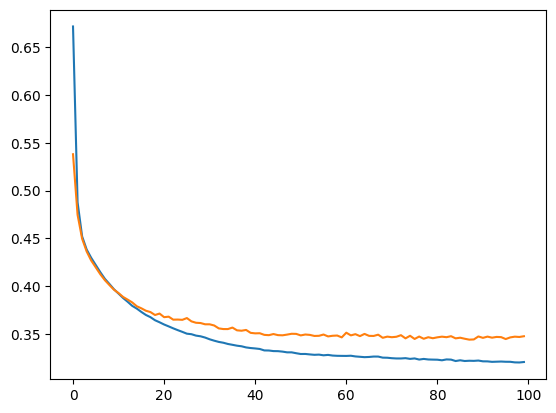

In [79]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

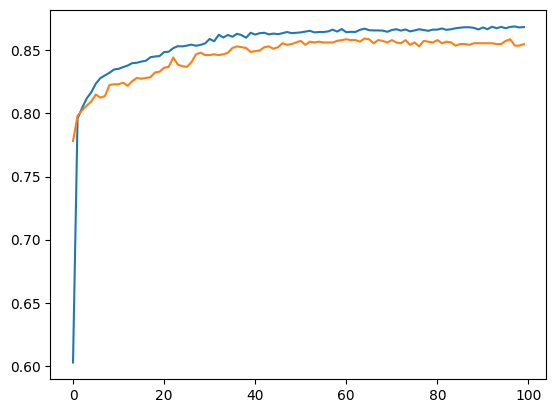

In [80]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])